# Example of using with_columns for Pandas

This allows you to efficiently run groups of map operations on a dataframe.
Here's an example of calling it -- if you've seen `@subdag`, you should be familiar with the concepts.

In [1]:
%reload_ext hamilton.plugins.jupyter_magic
from hamilton import driver
import my_functions

my_builder = driver.Builder().with_modules(my_functions).with_config({"case":"thousands"})
output_node = ["final_df"]

/Users/jernejfrank/miniconda3/envs/hamilton/lib/python3.10/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(
/Users/jernejfrank/miniconda3/envs/hamilton/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


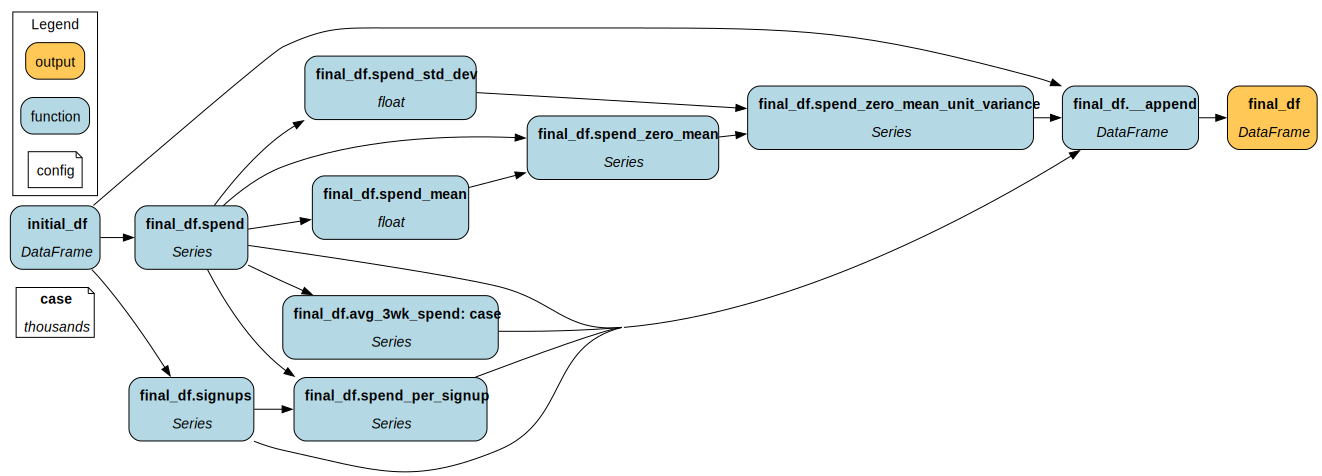

,signups,spend,avg_3wk_spend,spend_per_signup,spend_zero_mean_unit_variance
0,1,10000000.0,NaN,10000000.0,-1.064405
1,10,10000000.0,NaN,1000000.0,-1.064405
2,50,20000000.0,13333.333333,400000.0,-0.483821
3,100,40000000.0,23333.333333,400000.0,0.677349
4,200,40000000.0,33333.333333,200000.0,0.677349
5,400,50000000.0,43333.333333,125000.0,1.257934


In [2]:
%%cell_to_module with_columns_example --builder my_builder --display --execute output_node
import pandas as pd
from hamilton.plugins.h_pandas import with_columns
import my_functions

output_columns = [
    "spend",
    "signups",
    "avg_3wk_spend",
    "spend_per_signup",
    "spend_zero_mean_unit_variance",
]

def initial_df()->pd.DataFrame:
    return pd.DataFrame.from_dict(
        { 
            "signups": pd.Series([1, 10, 50, 100, 200, 400]),
            "spend": pd.Series([10, 10, 20, 40, 40, 50])*1e6,
            }
            )

# the with_columns call
@with_columns(
    *[my_functions],
    columns_to_pass=["spend", "signups"], # The columns to select from the dataframe
    select=output_columns, # The columns to append to the dataframe
    # config_required = ["a"]
)
def final_df(initial_df: pd.DataFrame) -> pd.DataFrame:
    return initial_df

   signups       spend  avg_3wk_spend  spend_per_signup  \
0        1  10000000.0            NaN        10000000.0   
1       10  10000000.0            NaN         1000000.0   
2       50  20000000.0      13.333333          400000.0   
3      100  40000000.0      23.333333          400000.0   
4      200  40000000.0      33.333333          200000.0   
5      400  50000000.0      43.333333          125000.0   

   spend_zero_mean_unit_variance  
0                      -1.064405  
1                      -1.064405  
2                      -0.483821  
3                       0.677349  
4                       0.677349  
5                       1.257934  


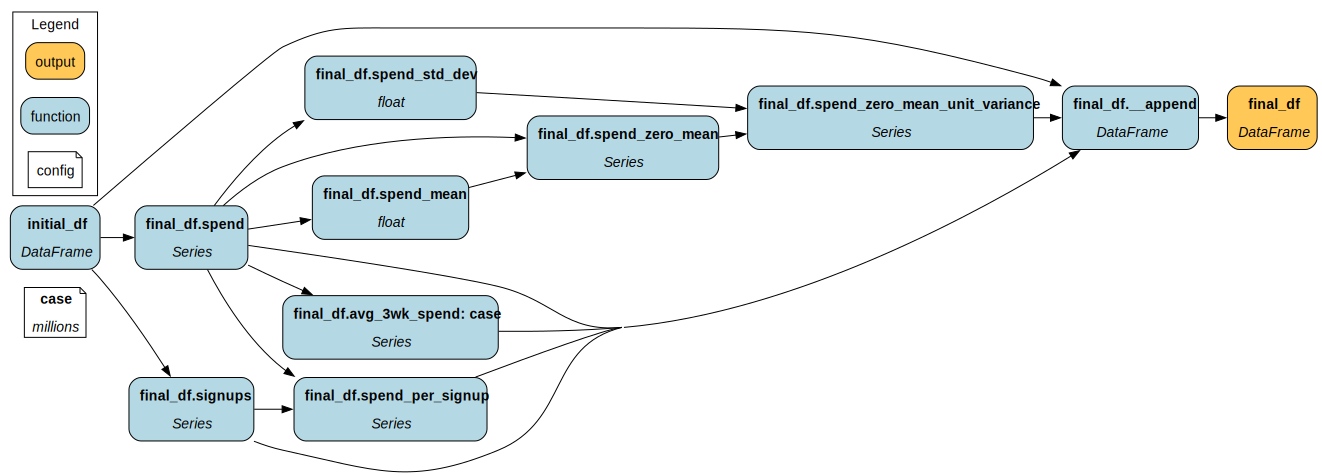

In [3]:
import with_columns_example
dr = driver.Builder().with_modules(my_functions, with_columns_example).with_config({"case":"millions"}).build()
print(dr.execute(final_vars=["final_df"])["final_df"])
dr.visualize_execution(final_vars=["final_df"])
